## Pre-requisitos

Se debe descargar los archivos:
* test_para_submit_538.csv
* xgb_submit_score_538.pickle.dat

desde el siguiente link: 

https://drive.google.com/open?id=1MJurFh9Kjd9zUevnTRylYJmTFF8Labzn

y guardarlos en una carpeta del mismo directorio que este archivo denominada:

sets_de_datos/

In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import time
import matplotlib.pyplot as plt

In [3]:
X_test = pd.read_csv('sets_de_datos/test_para_submit_538.csv')

In [7]:
X_test.set_index('id', inplace = True)

In [8]:
xgb_regressor_loaded = pickle.load(open("sets_de_datos/xgb_submit_score_538.pickle.dat", "rb"))

In [13]:
t0 = time.time()
y_kaggle_pred = xgb_regressor_loaded.predict(X_test)
t1 = time.time()
print('tiempo = {0:.2f} minutos'.format((t1-t0)/60))

tiempo = 0.09 minutos


In [14]:
res = pd.DataFrame(y_kaggle_pred, index=X_test.index, columns=['target'])
res.to_csv("submits/submit_xgboost_score_538.csv", header=True)

In [17]:
def plot_importance(modelo):
  feat_imp_1 = pd.Series(modelo.get_booster().get_fscore()).sort_values(ascending=False)
  feat_imp_1.plot(kind='barh', title='Feature Importances', figsize=(15, 15))
  plt.ylabel('Feature Importance Score')
  plt.show()
  return feat_imp_1

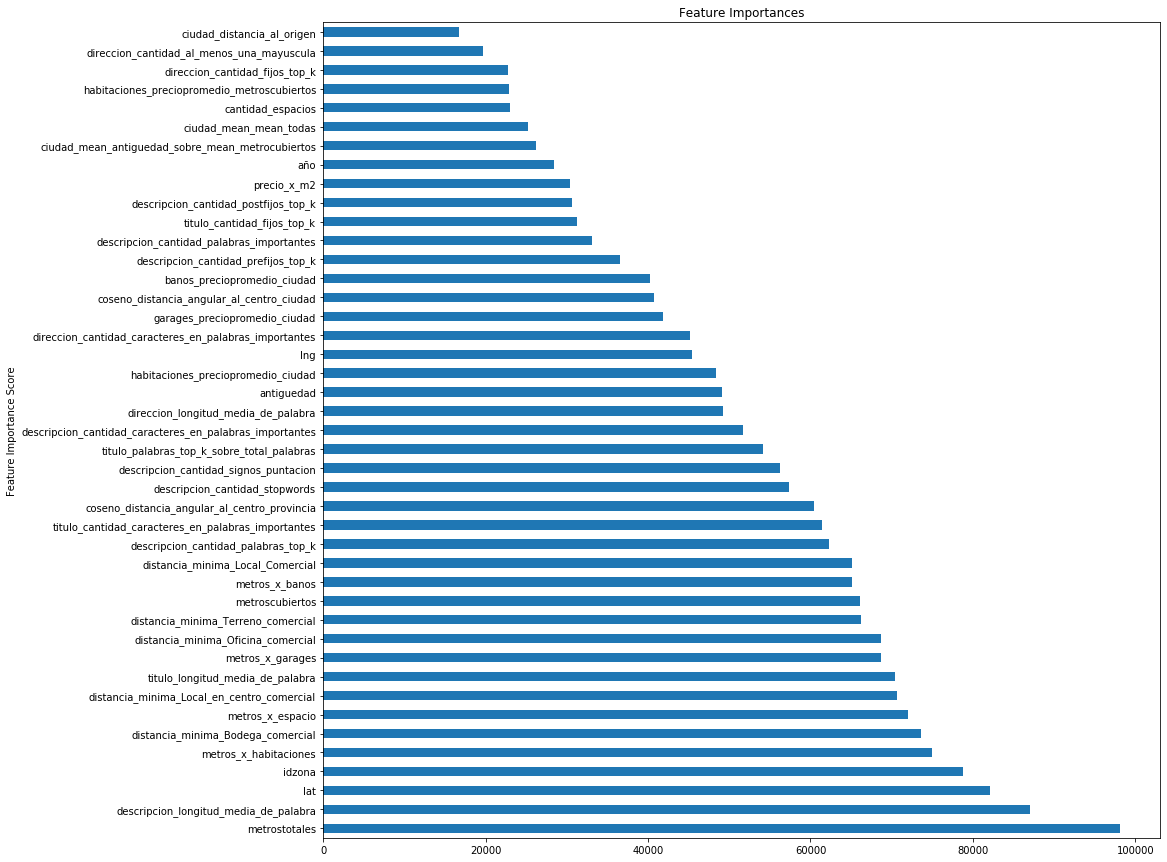

metrostotales                                              98129
descripcion_longitud_media_de_palabra                      86968
lat                                                        82099
idzona                                                     78815
metros_x_habitaciones                                      74907
distancia_minima_Bodega_comercial                          73550
metros_x_espacio                                           72055
distancia_minima_Local_en_centro_comercial                 70712
titulo_longitud_media_de_palabra                           70362
metros_x_garages                                           68716
distancia_minima_Oficina_comercial                         68638
distancia_minima_Terreno_comercial                         66187
metroscubiertos                                            66082
metros_x_banos                                             65061
distancia_minima_Local_Comercial                           65052
descripcion_cantidad_pala

In [21]:
plot_importance(xgb_regressor_loaded)